In [2]:
using Revise
using BilharesMarkov
using PyPlot
using DynamicalBilliards
using Interact, Blink

In [31]:
bd = billiard_csinai()
plot(bd)

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f793a4bffa0>

In [6]:
Ns = spinbox(1:500,label="N")
ts = spinbox(1:500,label="t")
gcolrs = ["C$(rand(1:9))" for i in 1:500];

mush(s) = billiard_cmushroom(sw = .8, scale=s);
quad(s) = billiard_csq(s)
sinai(s) = billiard_csinai(s/4,s,s)
pol(s,n) = billiard_polygon(n,s)

curv = dropdown(Dict("Hiperbólico"=>HyperBKParticle, "Elíptico"=>EllipticParticle, "Plano"=>Particle))

bils = dropdown(Dict(
    "cogumelo" => mush,
    "polígono" => pol,
    "sinai" => sinai
))

bil_ui(bil,s) = (map(bil,s), nothing)
function bil_ui(bil::typeof(pol),s) 
    n = spinbox(3:10,label="N lados")
    (map(bil,s,n),n)
end
b = button(label = "Outro!")

pygui(true)
gs = matplotlib.gridspec.GridSpec(1,2,width_ratios=[1,3])

ph_plot =  map(curv) do Pt
    close("all")
    fig = plt.figure(figsize=(10,5))
    rcurv = togglebuttons(Dict('S'=>true, 'N'=>false), label="Mostra curvatura?")
    if Pt == HyperBKParticle
        scurv = spinbox(0.01:0.01:0.9, label = "Curvatura")
    elseif Pt == EllipticParticle
        scurv = spinbox(0.1:0.001:30., value=1., label = "Curvatura")
    else
        scurv = slider(0.01:0.1:30., label = "Curvatura")
    end
    map(rcurv, onchange(Ns), onchange(ts), bils, b) do r, N, t, bil, but
        Pp = r ? Pt : Particle
        colrs=gcolrs[1:N]
        bdo, bilwid = bil_ui(bil,onchange(scurv))
        map(bdo) do bd
            p = random_on_border(Pt,bd,N)
            bmap, arcs = parallelize(boundarymap, bd, t, p)
            fig.clear()
            ax0 = plt.subplot(get(gs,0))
            ax1 = plt.subplot(get(gs,1))
            plot_boundarymap((e1->(e2->convert.(Float64,e2)).(e1)).(bmap),convert.(Float64,arcs); color=colrs, ax=ax1)
            ax0.set_aspect("equal")
            plot(bd, Pp, ax=ax0)
            plot(p, Pp, colrs; ax=ax0)
            if r
                xs, ys = timeseries!(p[1],bd,t)
                ax0.plot(convert.(Float64,xs[2:end]),convert.(Float64,ys[2:end]))
            end
        end
        if Pt == Particle
            return bilwid
        else
            return vbox(rcurv, scurv,bilwid)
        end
    end
end

ui = vbox(hbox(Ns,ts),hbox(curv, bils, ph_plot),hline(),b)
w = Window(Dict(:width=>600,:height=>200))
body!(w, ui);

sys:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/usr/lib/python3.8/tkinter/__init__.py", line 804, in callit
    func(*args)
  File "/usr/lib/python3/dist-packages/matplotlib/backends/_backend_tk.py", line 338, in idle_draw
    self.draw()
  File "/usr/lib/python3/dist-packages/matplotlib/backends/backend_tkagg.py", line 10, in draw
    _backend_tk.blit(self._tkphoto, self.renderer._renderer, (0, 1, 2, 3))
  File "/usr/lib/python3/dist-packages/matplotlib/backends/_backend_tk.py", line 80, in blit
    photoimage.blank()
  File "/usr/l

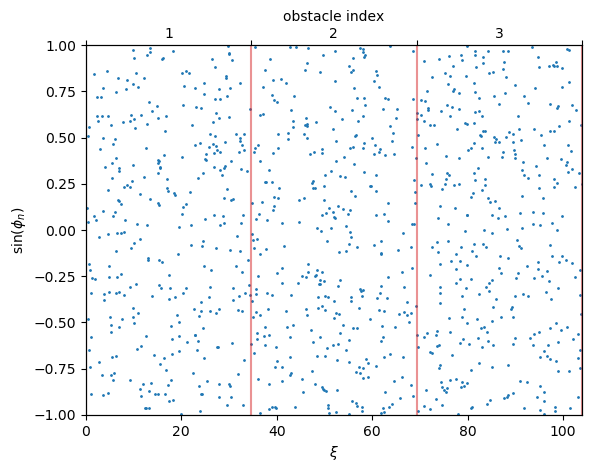

(PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f77e3b10250>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f77e30a9fa0>)

In [13]:
pol(s,n) = billiard_polygon(n,s)
bd = pol(20.,3)
p = random_on_border(Particle,bd,1000)
bmap, arcs = parallelize(boundarymap, bd, 1, p)
plot_boundarymap(bmap,arcs)